# Exploratory Data Analysis

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Project/ratings.csv')
books = pd.read_csv('/content/drive/MyDrive/Project/books.csv')
users = pd.read_csv('/content/drive/MyDrive/Project/users.csv')
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(ratings),
                                                                           len(ratings['ISBN'].unique()),
                                                                           len(ratings['userID'].unique())))

Number of ratings: 57496
Number of books: 5383
Number of users: 1640


# Age Distribution

In [ ]:
bins = 10  
range = (0, 100)
plt.hist(users.Age, bins, range, color = 'green',
        histtype = 'bar',rwidth = 0.9)
plt.xlabel('age')
plt.ylabel('No. of people')
plt.title('Age Distribution')
plt.show()

NameError: ignored

Observation : The highest amount of users is aged between 30-40 years.

# Distribution of Book Ratings

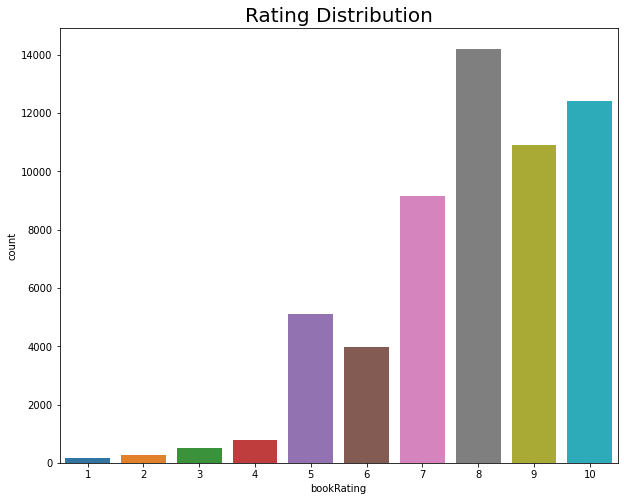

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='bookRating',data=ratings)
plt.title('Rating Distribution',size=20)
plt.show()

Observation : Most often users tend to rate 8 for the books. Second frequent score is 10.

# Merging 3 datasets

In [ ]:
ratings_merge = ratings.merge(users, on='userID')
ratings_merge = ratings_merge.merge(books, on='ISBN')
ratings_merge.head(5)

,userID,ISBN,bookRating,Age,City,State,Country,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlM
0,277427,002542730X,10,48,gilbert,arizona,usa,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,8019,002542730X,9,34,toronto,ontario,canada,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,34,NaN,NaN,NaN,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,18,byron,minnesota,usa,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,16996,002542730X,8,23,stratford,iowa,usa,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley & Sons Inc,http://images.amazon.com/images/P/002542730X.0...


# Ratings distribution by Age

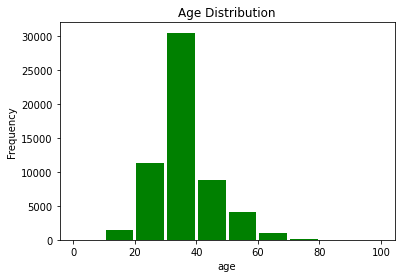

In [ ]:
bins = 10  
range = (0, 100)
plt.hist(ratings_merge.Age, bins, range, color = 'green',
        histtype = 'bar',rwidth = 0.9)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Observation : The distribution of number of given ratings by age is very similar to the distribution of all users by age. Most of the ratings were given by users in the age group 30-40.

# Ratings Distribution by Location

In [ ]:
df_users_country = ratings_merge['Country'].value_counts(normalize = True).reset_index()
df_users_country.columns = ['country', 'share']
df_users_country= df_users_country[df_users_country.country != 'Other']
df_users_country.loc[df_users_country['share']< 0.01 ] = 'Other', df_users_country[df_users_country['share']<0.01]['share'].sum()
df_users_country.drop_duplicates(inplace=True)

([<matplotlib.patches.Wedge at 0x7f8253e2ed50>,
 [Text(-3.299450464756218, -0.0602215129333272, 'usa'),
  Text(3.1000279442747436, -1.1312942785657985, 'canada'),
  Text(3.299627302575464, 0.04959500074168917, 'united kingdom'),
  Text(3.2820856094155104, 0.3433861564880256, 'portugal'),
  Text(3.2499303358523224, 0.5726716442315036, 'australia'),
  Text(3.07026524542454, 1.2097401881140395, 'Other')],
 [Text(-1.7997002535033912, -0.03284809796363301, '78.4%'),
  Text(1.6909243332407689, -0.6170696064904354, '9.9%'),
  Text(1.7997967104957073, 0.027051818586375904, '1.7%'),
  Text(1.7902285142266419, 0.1873015399025594, '1.1%'),
  Text(1.7726892741012665, 0.31236635139900193, '1.1%'),
  Text(1.6746901338679305, 0.6598582844258396, '5.3%')])

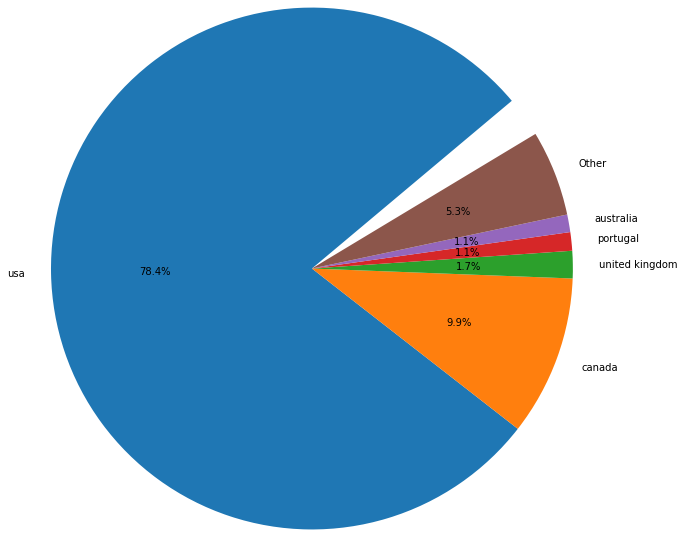

In [ ]:
plt.pie(df_users_country.share, labels = df_users_country.country,  
        startangle=40,radius = 3,autopct = '%1.1f%%')

Observation : Most of the ratings are given by users from USA.

# Books Ratings By Year of Publication

In [ ]:
rating_count_yr = pd.DataFrame(ratings_merge.groupby('yearOfPublication')['bookRating'].count())
rating_count_yr = rating_count_yr.sort_values('bookRating',ascending= False).head(20).reset_index()  
rating_count_yr.columns = ['yr','count']
rating_count_yr


,yr,count
0,2002,6837
1,2001,5295
2,2003,5065
3,1999,4680
4,2000,4309
5,1998,3696
6,1996,3626
7,1997,3105
8,1994,2877
9,1995,2773


Text(0.5, 1.0, 'Years Of Publishing')

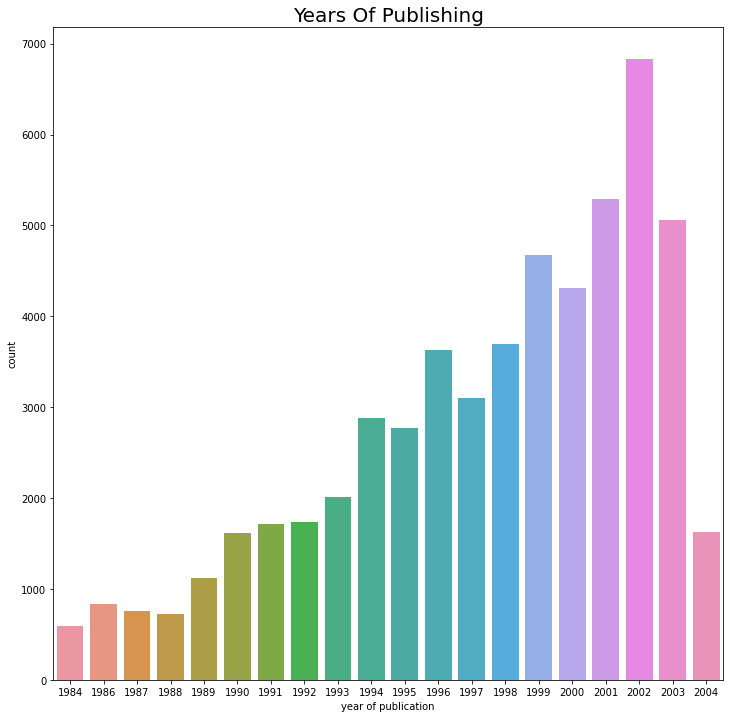

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x='yr',y='count',data=rating_count_yr)
plt.xlabel('year of publication')
plt.ylabel('count')
plt.title('Years Of Publishing',size=20)

# Most Popular Books

In [ ]:
rating_count = pd.DataFrame(ratings_merge.groupby('ISBN')['bookRating'].count())
rating_count = rating_count.sort_values('bookRating',ascending= False).head(20).reset_index()  
rating_count.columns = ['ISBN','bookRating']
rating_count = rating_count.merge(books, on='ISBN')
rating_count.head(5)


,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlM
0,0316666343,207,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
1,0385504209,163,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...
2,0312195516,120,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...
3,0142001740,113,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...
4,059035342X,110,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...


In [ ]:
popular_books = rating_count.drop('bookRating',axis=1).head(10)

Text(0.5, 1.0, 'Books with most Ratings')

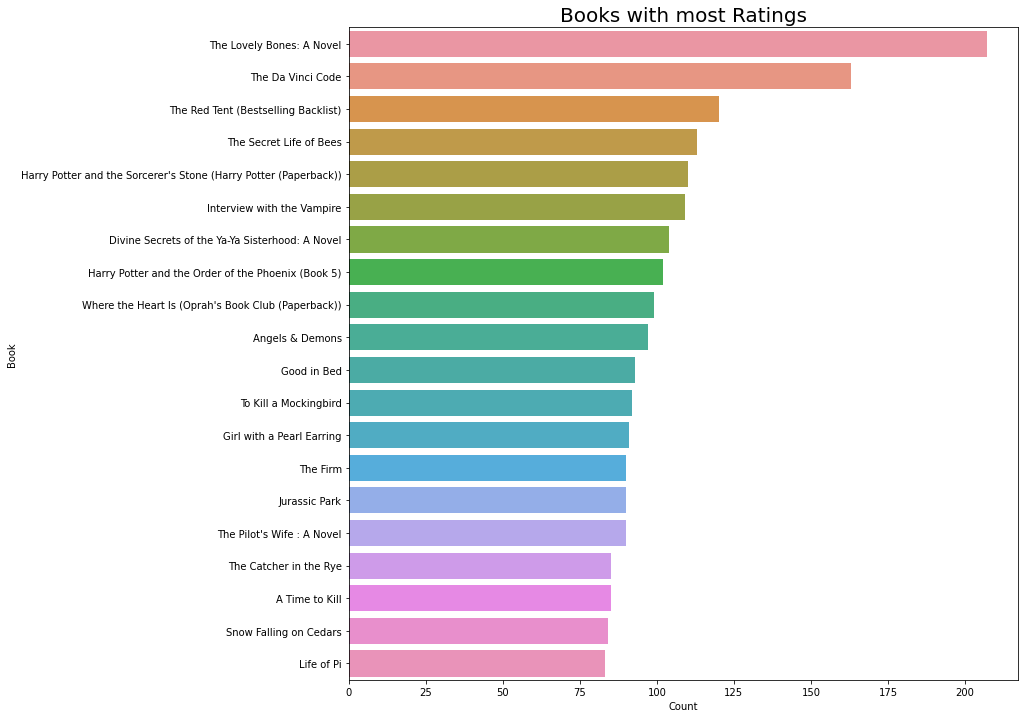

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x='bookRating',y='bookTitle',data=rating_count)
plt.xlabel('Count')
plt.ylabel('Book')
plt.title('Books with most Ratings',size=20)

Most Popular Reading is The Lovely Bones: A Novel

In [ ]:
avg_rating_book = pd.DataFrame(ratings_merge.groupby('bookTitle')['bookRating'].mean())
avg_rating_book['ratingCount'] = pd.DataFrame(ratings_merge.groupby('bookTitle')['bookRating'].count())
popular_books_avg = avg_rating_book.sort_values('ratingCount',ascending = False).head(20).reset_index()
popular_books_avg.columns = ['Book','Avg_rating','Total_ratings']
popular_books_avg

,Book,Avg_rating,Total_ratings
0,The Lovely Bones: A Novel,8.227053,207
1,The Da Vinci Code,8.631902,163
2,The Secret Life of Bees,8.677632,152
3,Harry Potter and the Chamber of Secrets (Book 2),8.909722,144
4,Bridget Jones's Diary,7.575540,139
5,Harry Potter and the Prisoner of Azkaban (Book 3),9.137405,131
6,Life of Pi,8.191667,120
7,The Red Tent (Bestselling Backlist),8.491667,120
8,Harry Potter and the Goblet of Fire (Book 4),9.284483,116
9,To Kill a Mockingbird,9.008850,113


Observation : In this data set, books with the highest number of ratings are also positively rated between 7-10.

# Most Popular Authors

In [ ]:
rating_count_Auth = pd.DataFrame(ratings_merge.groupby('bookAuthor')['bookRating'].count())
rating_count_Auth = rating_count_Auth.sort_values('bookRating',ascending= False).head(20).reset_index()
rating_count_Auth.columns = ['Author','bookRating']


Text(0.5, 1.0, 'Authors with most Ratings')

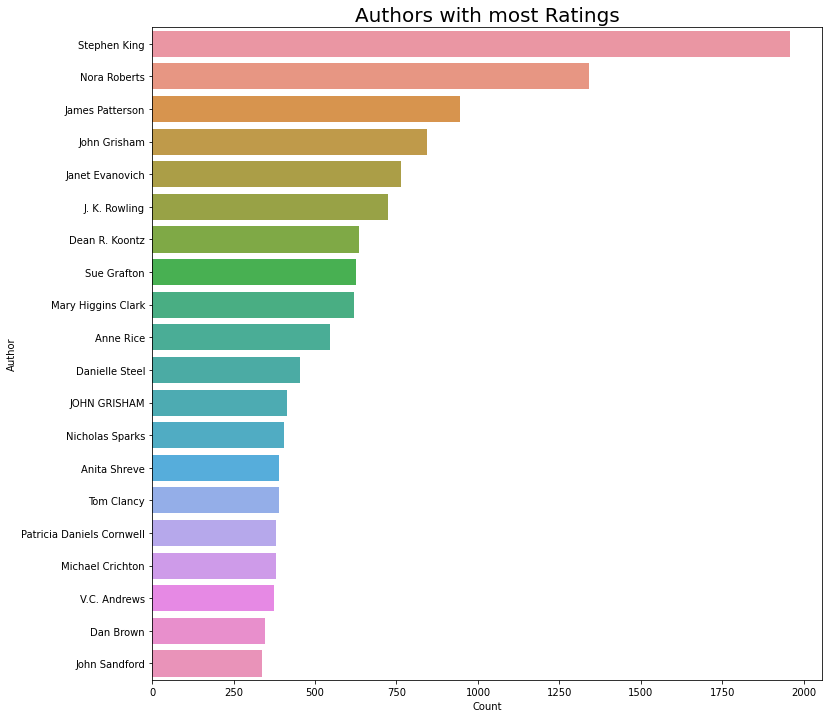

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x='bookRating',y='Author',data=rating_count_Auth)
plt.xlabel('Count')
plt.ylabel('Author')
plt.title('Authors with most Ratings',size=20)

In [ ]:
avg_rating = pd.DataFrame(ratings_merge.groupby('bookAuthor')['bookRating'].mean())
avg_rating['ratingCount'] = pd.DataFrame(ratings_merge.groupby('bookAuthor')['bookRating'].count())
avg_rating.columns = ['Avg_rating','ratingCount']
avg_rating.sort_values('ratingCount',ascending = False).head(20)

,Avg_rating,ratingCount
bookAuthor,,
Stephen King,8.061829,1957
Nora Roberts,7.762864,1341
James Patterson,7.747881,944
John Grisham,7.639810,844
Janet Evanovich,8.085079,764
J. K. Rowling,9.040111,723
Dean R. Koontz,7.725984,635
Sue Grafton,7.974482,627
Mary Higgins Clark,7.700000,620


Similarly to books, the most popular authors are also the ones with very good ratings. The author with the highest number of votes is Stephen King.

In [ ]:
ratings_merge.to_csv('/content/drive/MyDrive/Project/ratings_merge.csv', encoding='utf-8', index=False)

In [ ]:
popular_books.to_csv('/content/drive/MyDrive/Project/popular_books.csv', encoding='utf-8', index=False)